In [28]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import sys
import gc
from time import time
from collections import Counter
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from tqdm import tqdm
import wandb
import glob
import random
import seaborn as sns

wandb.login()

sys.path.insert(0,'../src/')

# -----
from data_processing import *
from model_train import *
from labeling_system import *
import cvt as cvt
import cvt_benchmark as cvtb

In [2]:
labels = np.load('../output/labels_test_run1_final.npy', allow_pickle=True)
outputs = np.load('../output/outputs_test_run1_final.npy', allow_pickle=True)
results = np.load('../output/results_runs_run1_final.npy', allow_pickle=True)
results_class = np.load('../output/results_runs_class_run1_final.npy', allow_pickle=Tru11

In [7]:
results[0][1][0]

[0.49371101521225624,
 0.6236247334754798,
 0.6400789300064657,
 0.6127380889473023,
 0.6204730089190517,
 0.5686480403665467,
 0.7866405307599518,
 0.8103326233894098,
 0.7787469285564796,
 0.7876904389179767]

In [8]:
result_1 = results[0][1]

In [9]:
train_loss = []
for i in result_1:
    train_loss.append(result_1[i][0])

print(len(train_loss), train_loss[:4])

25 [0.49371101521225624, 0.2969763063799852, 0.2828452778777588, 0.27060815055233073]


In [11]:
train_acc = []
for i in result_1:
    train_acc.append(result_1[i][1])

print(len(train_acc), train_acc[:4])

25 [0.6236247334754798, 0.7684008528784648, 0.7755223880597015, 0.7845628997867804]


In [12]:
train_prec = []
for i in result_1:
    train_prec.append(result_1[i][2])

print(len(train_prec), train_prec[:4])

25 [0.6400789300064657, 0.7749102520162703, 0.7819426238999414, 0.7911540436579741]


In [13]:
train_recall = []
for i in result_1:
    train_recall.append(result_1[i][3])

print(len(train_recall), train_recall[:4])

25 [0.6127380889473023, 0.7692002558888914, 0.7766496334498959, 0.7855557627477222]


In [14]:
train_F1 = []
for i in result_1:
    train_F1.append(result_1[i][4])

print(len(train_F1), train_F1[:4])

25 [0.6204730089190517, 0.7716500388916548, 0.7790333556971496, 0.7880648413511239]


In [15]:
valid_loss = []
for i in result_1:
    valid_loss.append(result_1[i][5])

print(len(valid_loss), valid_loss[:4])

25 [0.5686480403665467, 0.5155546696827409, 0.5305824187753859, 0.5204445041707111]


In [16]:
valid_acc = []
for i in result_1:
    valid_acc.append(result_1[i][6])

print(len(valid_acc), valid_acc[:4])

25 [0.7866405307599518, 0.8009650180940893, 0.793124246079614, 0.7950844390832328]


In [17]:
valid_prec = []
for i in result_1:
    valid_prec.append(result_1[i][7])

print(len(valid_prec), valid_prec[:4])

25 [0.8103326233894098, 0.805731796692732, 0.808858184867156, 0.7948007779047327]


In [18]:
valid_recall = []
for i in result_1:
    valid_recall.append(result_1[i][8])

print(len(valid_recall), valid_recall[:4])

25 [0.7787469285564796, 0.8045415875640812, 0.7922695632264952, 0.8047801979923692]


In [19]:
valid_F1 = []
for i in result_1:
    valid_F1.append(result_1[i][9])

print(len(valid_F1), valid_F1[:4])

25 [0.7876904389179767, 0.8044102001257847, 0.79588956619408, 0.7979512384617661]


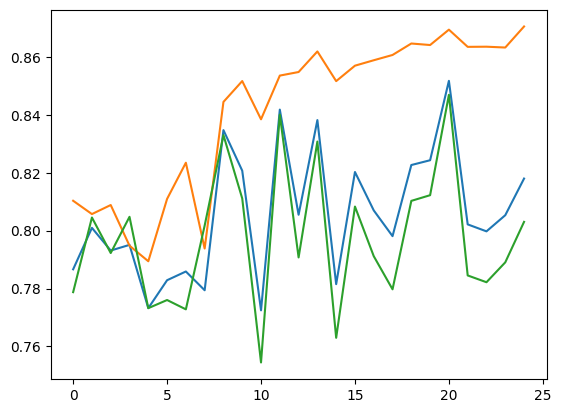

In [39]:
#plt.plot(train_acc)
plt.plot(valid_acc)
#plt.plot(train_prec)
plt.plot(valid_prec)
#plt.plot(train_recall)
plt.plot(valid_recall)
plt.show()

In [34]:
labels

array([[2., 1., 1., ..., 0., 0., 2.]], dtype=float32)

In [25]:
outputs

array([[2., 1., 1., ..., 0., 0., 0.]], dtype=float32)

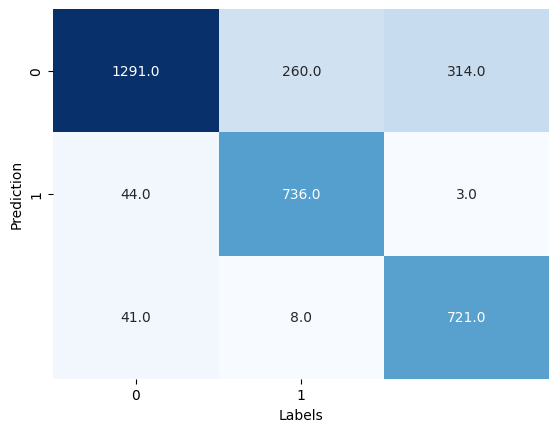

In [40]:
ct = pd.crosstab(outputs, labels, rownames=["Prediction"], colnames=["Labels"])
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="01", yticklabels="01", fmt=".1f", cbar=False)
plt.show()